In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df24 = pd.read_excel('.\data\/HIST_PAINEL_COVIDBR_24jun2020.xlsx')
df30 = pd.read_excel('.\data\/HIST_PAINEL_COVIDBR_01jul2020.xlsx')

In [4]:
cat_dia_semana = pd.CategoricalDtype(categories=['dom', 'seg', 'ter', 'qua', 'qui', 'sex', 'sab'], ordered=True)
df24['dia_semana'] = df24['data'].dt.dayofweek
df24['dia_semana_nm'] = df24['dia_semana'].replace({0:'seg', 1: 'ter', 2:'qua', 3:'qui', 4:'sex', 5:'sab', 6:'dom'}).astype(cat_dia_semana)

df30['dia_semana'] = df30['data'].dt.dayofweek
df30['dia_semana_nm'] = df30['dia_semana'].replace({0:'seg', 1: 'ter', 2:'qua', 3:'qui', 4:'sex', 5:'sab', 6:'dom'}).astype(cat_dia_semana)

In [5]:
fltr = df24['estado'] == 'MS'
df24 = df24.loc[fltr, :]
fltr = df24['municipio'] == 'Dourados'
df24 = df24.loc[fltr, :]

In [6]:
fltr = df30['estado'] == 'MS'
df30 = df30.loc[fltr, :]
fltr = df30['municipio'] == 'Dourados'
df30 = df30.loc[fltr, :]

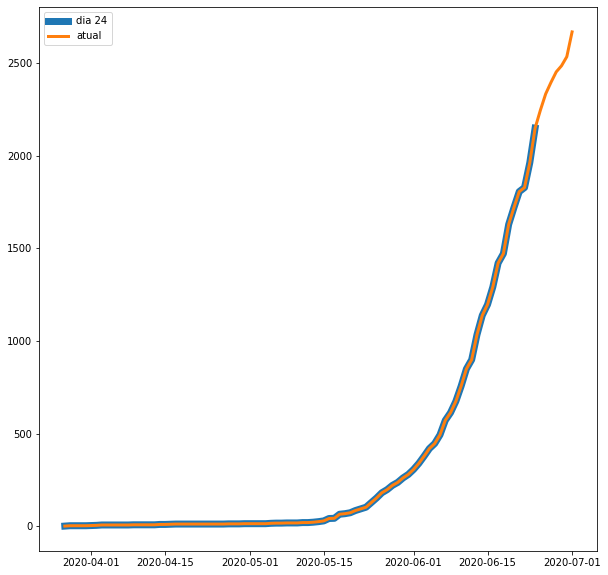

In [7]:
fig = plt.figure(1, figsize=(10,10))
plt.plot(df24['data'] , df24['casosAcumulado'],  label ='dia 24' ,linewidth=7)
plt.plot(df30['data'] , df30['casosAcumulado'],  label ='atual' , linewidth=3)
plt.legend()


In [8]:
df24['CA_LOG'] =   np.log10(df24['casosAcumulado'])
df30['CA_LOG'] =   np.log10(df30['casosAcumulado'])

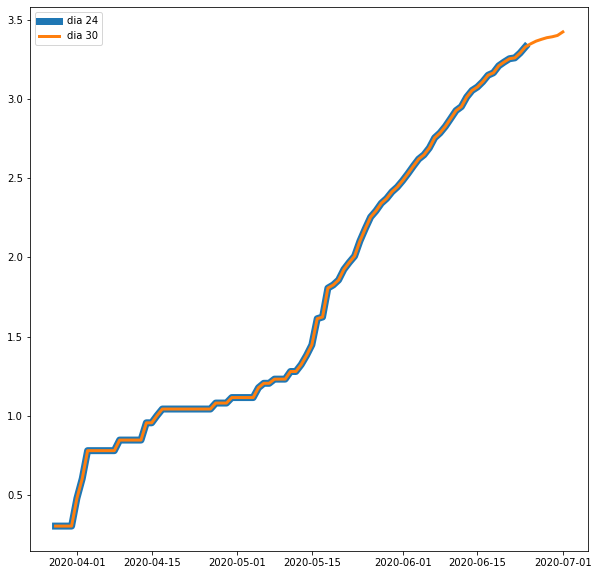

In [9]:
fig = plt.figure(1, figsize=(10,10))
plt.plot(df24['data'] , df24['CA_LOG'],  label ='dia 24' ,linewidth=7)
plt.plot(df30['data'] , df30['CA_LOG'],  label ='dia 30' , linewidth=3)
plt.legend()

(array([737516., 737530., 737546., 737560., 737577., 737591., 737607.]),
 <a list of 7 Text xticklabel objects>)

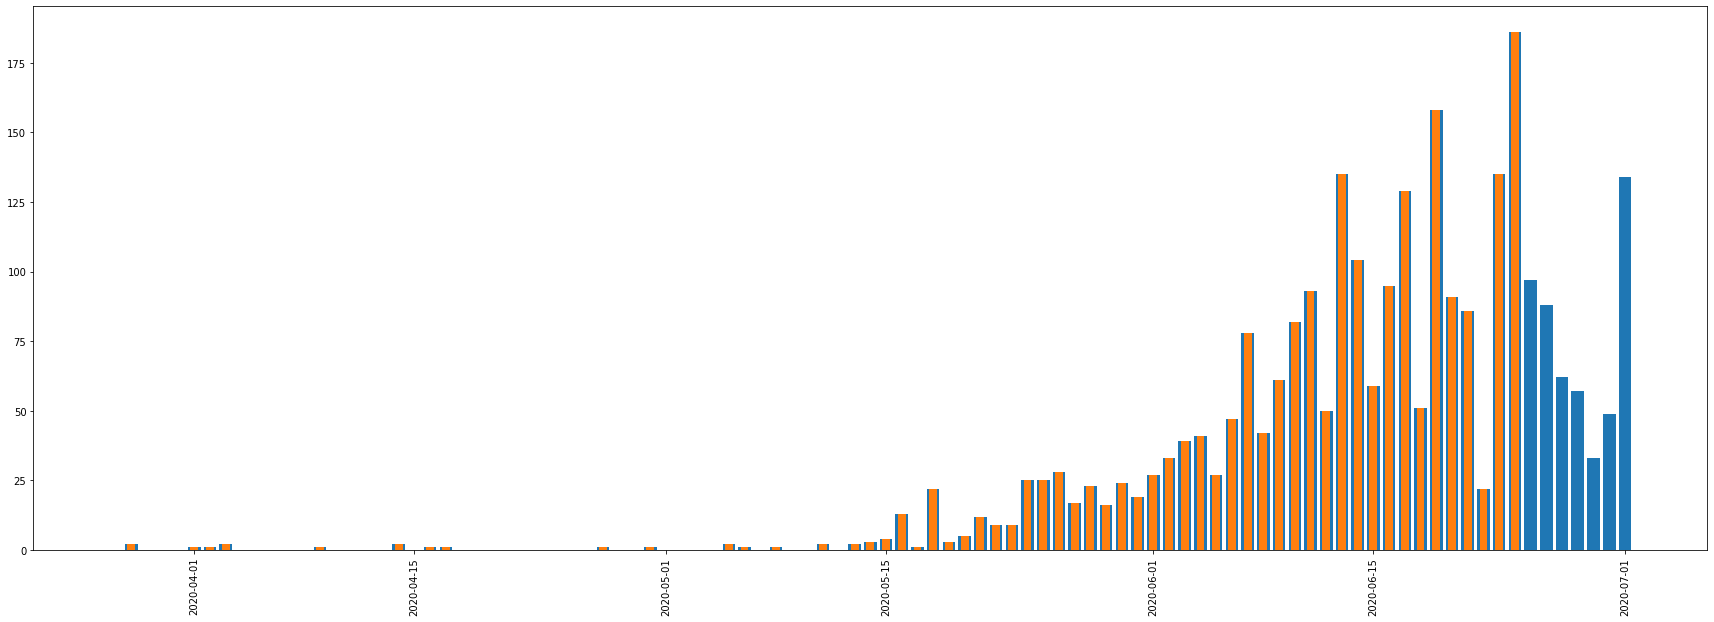

In [10]:
fig = plt.figure(1, figsize=(30,10))
plt.bar(df30['data'] , df30['casosNovos'], width = .8)
plt.bar(df24['data'] , df24['casosNovos'], width = .5)
plt.xticks(rotation=90) 

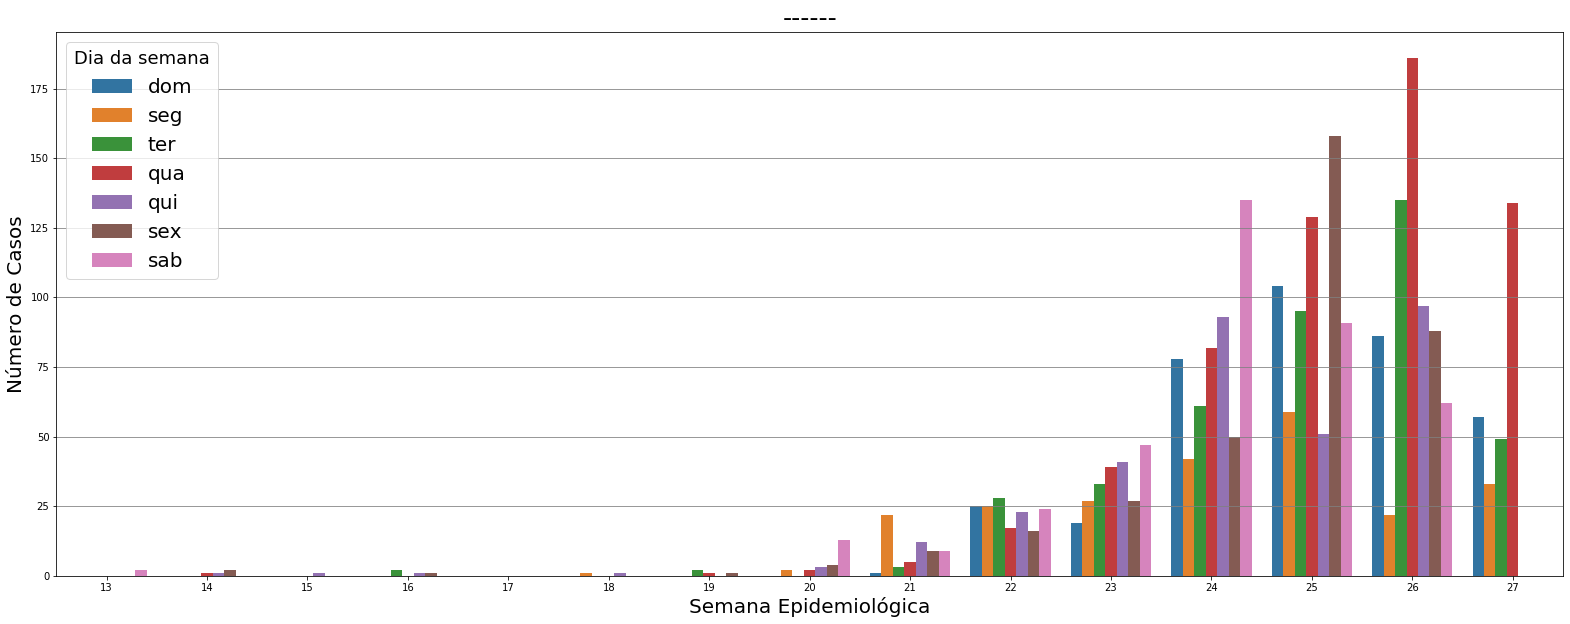

In [11]:
    fig = plt.figure(1, figsize=(df30['semanaEpi'].max(),10))
    sns.barplot(x='semanaEpi', y='casosNovos', hue="dia_semana_nm", data=df30,   dodge= True)
    #sns.barplot(x='semanaEpi', y='casosNovos', hue="dia_semana_nm", data=df24,   dodge= True)
    
    plt.title('------', fontsize=25)
    plt.xlabel('Semana Epidemiológica', fontsize=20)
    plt.ylabel('Número de Casos', fontsize=20)
    plt.grid(axis='y', color='grey')
    plt.rcParams['legend.title_fontsize'] = 18

    plt.legend(title='Dia da semana', loc='upper left', prop={'size': 20})

In [13]:
df30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 484316 to 484412
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   regiao                  97 non-null     object        
 1   estado                  97 non-null     object        
 2   municipio               97 non-null     object        
 3   coduf                   97 non-null     int64         
 4   codmun                  97 non-null     float64       
 5   codRegiaoSaude          97 non-null     float64       
 6   nomeRegiaoSaude         97 non-null     object        
 7   data                    97 non-null     datetime64[ns]
 8   semanaEpi               97 non-null     int64         
 9   populacaoTCU2019        97 non-null     object        
 10  casosAcumulado          97 non-null     int64         
 11  casosNovos              97 non-null     int64         
 12  obitosAcumulado         97 non-null     int

In [15]:
fltr = df30['municipio'] == 'Dourados'
df30.loc[fltr,:].head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,dia_semana,dia_semana_nm,CA_LOG
484316,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-03-27,13,222949,0,0,0,0,NaN,NaN,0.0,4,sex,-inf
484317,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-03-28,13,222949,2,2,0,0,NaN,NaN,0.0,5,sab,0.30103
484318,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-03-29,14,222949,2,0,0,0,NaN,NaN,0.0,6,dom,0.30103
484319,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-03-30,14,222949,2,0,0,0,NaN,NaN,0.0,0,seg,0.30103
484320,Centro-Oeste,MS,Dourados,50,500370.0,50003.0,DOURADOS,2020-03-31,14,222949,2,0,0,0,NaN,NaN,0.0,1,ter,0.30103
